# AlexNet with Keras - New Data

## Step 1: Import libraries and create an environment

1. Open Terminal
2. `conda create -n TF python=3.5 tensorflow pandas numpy jupyter ipython matplotlib scikit-learn`
3. `. activate TF`
4. `conda install -c derickl tflearn`
5. `cd` to directory of choice
6. `jupyter notebook`

In [1]:
import tensorflow as tf
from tensorflow import keras
#from tf.keras.utils import to_categorical
import numpy as np
np.random.seed(1000)

import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

1.10.0


## Step 2: Import data

In [2]:
#import tflearn.datasets.oxflower17 as oxflower17
#x, y = oxflower17.load_data(one_hot=True)

# TRYING DIFFERENT DATA - Because I think we will be able to use this one
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

This is a fun, alternative version to the MNIST digits, check out the first few images:

In [3]:
# Use for later, easier to plot with the names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/Users/laurenwaggoner/anaconda3/envs/dec-lab2/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


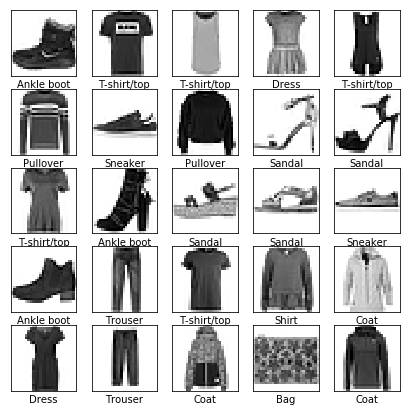

In [4]:
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*, this is the data the model uses to learn.
* The model is tested against the *test set*, the `test_images` and `test_labels` arrays.

The images are 28x28 numpy arrays (784 pixels in each one), with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

There are 60k train images and 10k test, let's also make a validation set that is 20% of the train set (so 12k images). The labels appear to be shuffled, so we're not going to worry about doing that for now and we will just take the first 12k for the validation set. 

In [5]:
print(len(train_images))
print(len(test_images))

60000
10000


In [6]:
# Creating validation set
x_val = train_images[:12000]
partial_x_train = train_images[12000:]

y_val = train_labels[:12000]
partial_y_train = train_labels[12000:]

print(len(x_val))
print(len(partial_x_train))

12000
48000


In [7]:
#Can potentially add more to explore the data here, basics
#Because exploring your data is important :) 

## Step 2+: Preprocess Data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255, but we would like to have them in the range of 0 to 1, so let's do it.

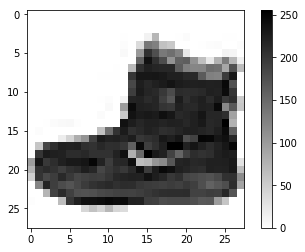

In [8]:
# Images pixel values are originally between 0 and 255
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.gca().grid(False)

In [9]:
# First lets see if we can get it to 224x224 (if not here, then after reshaping)

In [10]:
# Preprocess data
x_val = x_val / 255.0
partial_x_train = partial_x_train / 255.0
test_images = test_images / 255.0

## Step 3: Create a sequential model, Compile, and Train

**Add 5 Convolutional layers:** 
Batch normalize all convolutional layers

**Layer 1:**
*Hint: x.shape should help you understand inputs for Convolutional layer*

Convolutional layer with 96 filters, 11 by 11 kernel, strides of 4, valid padding, relu activation

Max Pooling layer with 2 by 2 pool size, valid padding

**Layer 2:**
Convolutional layer with 256 filters, 11 by 11 kernel, strides of 1, valid padding, relu activation

**Layer 3:**
Convolutional layer with 384 filters, 3 by 3 kernel, strides of 1, valid padding, relu activation

**Layer 4:**
Convolutional layer with 384 filters, 3 by 3 kernel, stride of 1, valid padding, relu activation

**Layer 5:**
Convolutional layer with 256 filters, 3 by 3 kernel, stride of 1, valid padding, relu activation

Max Pooling layer with 2 by 2 pool size, valid padding

**Add 3 Fully Connected Layers:**
Flatten data to pass to dense layers

*Note: Add Dropout of 0.5 

**Layer 1:**
Dense layer 4096, relu activation 
*Note: 4096 is an AlexNet parameter*

**Layer 2:**
Dense Layer 4096, relu activation

**Layer 3:**
Dense Layer 1000, relu activation

**Output Layer**
Dense layer with 17 outputs to match the number of classes, softmax activation

**Model Summary**
Use model.summary to get output shapes and number of parameters

**Compile**
Compile the model with categorical cross entropy loss, adam optimizer, accuracy metrics

**Train the model**
Train the model with batch size of 64, 1 epoch to start (you can change this later), and verbose=1
Hold back 20% of data for dev set and don't forget to shuffle

*Hints:*

*Hint 1: model.add(Conv2D(...))*

*Hint 2: model.add(BatchNormalization())*

*Hint 3: model.add(Dropout())*

*Hint 4: model.compile()*

*Hint 5: model.fit*

*Hint 5: metrics = ["accuracy"]*



In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
train_labels.shape

(60000,)

In [13]:
partial_x_train.shape

(48000, 28, 28)

In [14]:
partial_y_train.shape

(48000,)

In [15]:
x_val.shape

(12000, 28, 28)

In [16]:
y_val.shape

(12000,)

In [17]:
# NEED TO RESHAPE THE MNIST DATA! For the dimensions tf.keras is expecting
#reshape before one hot encoding, this is for default channels last
partial_x_train = partial_x_train.reshape(partial_x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [18]:
partial_x_train.shape

(48000, 28, 28, 1)

In [19]:
x_val.shape

(12000, 28, 28, 1)

In [20]:
test_images.shape

(10000, 28, 28, 1)

In [21]:
#ADDED
partial_x_train = tf.image.resize_images(partial_x_train, size=[224,224], 
                                                 method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

In [22]:
partial_x_train.shape

TensorShape([Dimension(48000), Dimension(224), Dimension(224), Dimension(1)])

In [23]:
x_val = tf.image.resize_images(x_val, size=[224,224], 
                                                 method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

In [24]:
x_val.shape

TensorShape([Dimension(12000), Dimension(224), Dimension(224), Dimension(1)])

In [25]:
test_images = tf.image.resize_images(test_images, size=[224,224], 
                                                 method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

In [26]:
test_images.shape

TensorShape([Dimension(10000), Dimension(224), Dimension(224), Dimension(1)])

In [27]:
# one hot encode y
encoded_par_y_train = tf.keras.utils.to_categorical(partial_y_train)
encoded_y_val = tf.keras.utils.to_categorical(y_val)
encoded_test_labels = tf.keras.utils.to_categorical(test_labels)

In [28]:
encoded_par_y_train.shape

(48000, 10)

In [29]:
encoded_y_val.shape

(12000, 10)

### Convolutional Layers

In [30]:
model = keras.Sequential()

#### Layer 1 - Convolution and Max Pooling

In [31]:
model.add(tf.keras.layers.Conv2D(
    input_shape = (224,224,1),
    data_format="channels_last",
    filters=96, 
    kernel_size=(11,11), #was (11,11)
    strides = (4,4), #was (4,4)
    padding="valid", 
    activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2), 
    padding="valid"))
model.add(tf.keras.layers.BatchNormalization())

#### Layer 2 - Convolution 

In [ ]:
#Layer 2 - Convolution 
model.add(tf.keras.layers.Conv2D(
    filters=256, 
    kernel_size=(5,5), 
    #strides = (4,4), Unclear what the strides are in the paper.
    padding="valid", 
    activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2), 
    padding="valid"))
model.add(tf.keras.layers.BatchNormalization())

#### Layer 3 - Convolution 

In [ ]:
#Layer 3 - Convolution 
model.add(tf.keras.layers.Conv2D(
    filters=384, 
    kernel_size=(3,3), 
    #strides = (4,4), Unclear what the strides are in the paper.
    padding="valid", 
    activation="relu"))
model.add(tf.keras.layers.BatchNormalization())


#### Layer 4 - Convolution 

In [ ]:
#Layer 4 - Convolution 
model.add(tf.keras.layers.Conv2D(
    filters=384, 
    kernel_size=(3,3), 
    #strides = (4,4), Unclear what the strides are in the paper.
    padding="valid", 
    activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

#### Layer 5 - Convolution 

In [ ]:
#Layer 5 - Convolution 
model.add(tf.keras.layers.Conv2D(
    filters=256, 
    kernel_size=(3,3), 
    #strides = (4,4), Unclear what the strides are in the paper.
    padding="valid", 
    activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

#### Flatten Output and Pass to Fully Connected Layers

In [32]:
model.add(tf.keras.layers.Flatten())

### Fully Connected Layers

#### Layer 1 - Dense 4096

In [33]:
model.add(tf.keras.layers.Dense(128, input_shape=(224*224*1,)))#input_shape=(224*224*3,)))

In [34]:
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())

#### Layer 2 - Dense 4096

In [ ]:
model.add(tf.keras.layers.Dense(4096))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())

#### Layer 3 - Dense 1000

In [ ]:
model.add(tf.keras.layers.Dense(1000))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())

### Output Layer for 17 class softmax

In [35]:
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation("softmax"))

#### Model Summary

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        11712     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
flatten (Flatten)            (None, 69984)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               8958080   
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
__________

### Compile

In [37]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Train

In [ ]:
history1 = model.fit(partial_x_train, encoded_par_y_train, epochs=5, validation_data=(x_val, encoded_y_val), steps_per_epoch=750)#, shuffle=True)

#history1 = model.fit(partial_x_train, encoded_par_y_train, 
#                     batch_size=64, epochs=10, validation_data=(x_val, encoded_y_val))#, shuffle=True)

#history2 = model.fit(x, y, batch_size=128, epochs=20, verbose=1, validation_split=0.2, shuffle=True)
#model1.fit(partial_x_train, partial_y_train, 
#                      batch_size=100, epochs=15, validation_data=(x_val, y_val))
#also taking out verbose... 

Epoch 1/5


### Visualizing how our model did... 

`model.fit()` returns a `History` object that contains a dictionary with everything that happened during training:

In [ ]:
history_dict = history1.history
history_dict.keys()

In [ ]:
#will need to conda install matplotlib
import matplotlib.pyplot as plt 

%matplotlib inline

### Visualize Loss

In [ ]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Visualize Accuracy 

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()

plt.show()

### Evaluate Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, encoded_test_labels)

print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

In [ ]:
# Make predictions, where each prediction is a probability assigned for each class
predictions = model.predict(test_images)

# Simplify by taking the prediction that got the highest probability
predicted_label = [None] * len(predictions)

for i in range(len(predicted_label)):
    predicted_label[i]= np.argmax(predictions[i])

Confusion matrix and visual to examine

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix using sklearn.
cm = confusion_matrix(y_true=test_labels, y_pred=predicted_label)

# Make a log scale of confusion matrix for better plot
cm_log = np.ma.log10(cm)
cm_log = cm_log.filled(0)

num_classes = 10

# Print the confusion matrix as text.
print(cm)

# Plot the confusion matrix as an image.
plt.imshow(cm_log, interpolation='nearest', cmap=plt.cm.YlGnBu) #change to cm or cm_log depending

# Make various adjustments to the plot.
plt.tight_layout()
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation='vertical')
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('2D Model Confusion Matrix - Log Scale')
    
# Ensure the plot is shown correctly with multiple plots
# in a single Notebook cell.
plt.show()